# **Shri Ramdeobaba College of Engineering and Management, Nagpur**
# Name : Adarsh Gandhi
# Semester : 5th


# Problem Statement : The objective of this project is to predict whether a patient is likely to have a stroke based on various health factors and demographics. Early detection of stroke can significantly improve treatment outcomes and reduce healthcare costs.

# Data Import and Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('stroke_data.csv')

In [3]:
data = data.drop('id', axis=1)

# Data Preview :

In [4]:
# Display the first and last few rows of the dataset
print(data.head())
print(data.tail())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
      gender   age  hypertension  heart_disease ever_married      work_type  \
5105  Female  80.0             1              0   

# Dataset Information :

In [5]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


# Statistical Summary :

In [6]:
# Describe the dataset statistically
print(data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


# Dataset Shape and Missing Values :

In [7]:
# Check the shape of the dataset
print(data.shape)

(5110, 11)


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# Duplicate Row Check :

In [9]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# Outlier Detection with Box Plots :

In [10]:
# Set up the figure
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Age Outliers')

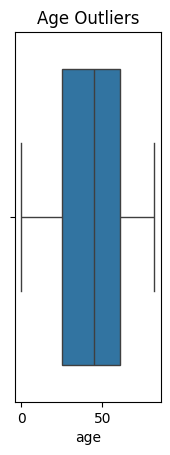

In [11]:
# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='age')
plt.title('Age Outliers')

Text(0.5, 1.0, 'BMI Outliers')

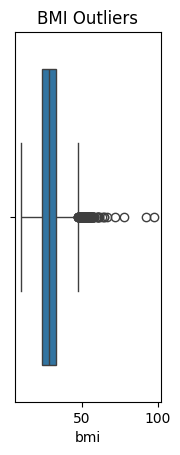

In [12]:
# Box plot for BMI
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='bmi')
plt.title('BMI Outliers')

Text(0.5, 1.0, 'Average Glucose Level Outliers')

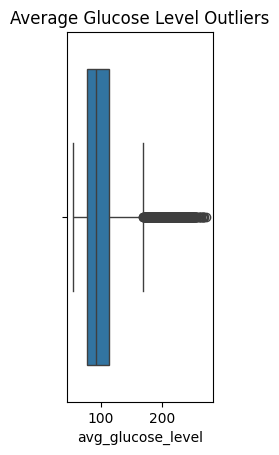

In [13]:
# Box plot for Average Glucose Level
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='avg_glucose_level')
plt.title('Average Glucose Level Outliers')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Outlier Removal using IQR :

In [15]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [16]:
# Remove outliers from 'age', 'bmi', and 'avg_glucose_level'
data = remove_outliers_iqr(data, 'age')
data = remove_outliers_iqr(data, 'bmi')
data = remove_outliers_iqr(data, 'avg_glucose_level')# Check the shape after removing outliers

In [17]:
# Check the shape after removing outliers
print(data.shape)

(4256, 11)


# Data Visualization :

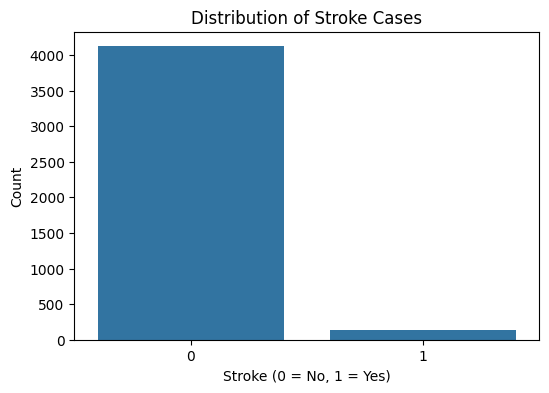

In [18]:
# Count plot for stroke variable
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

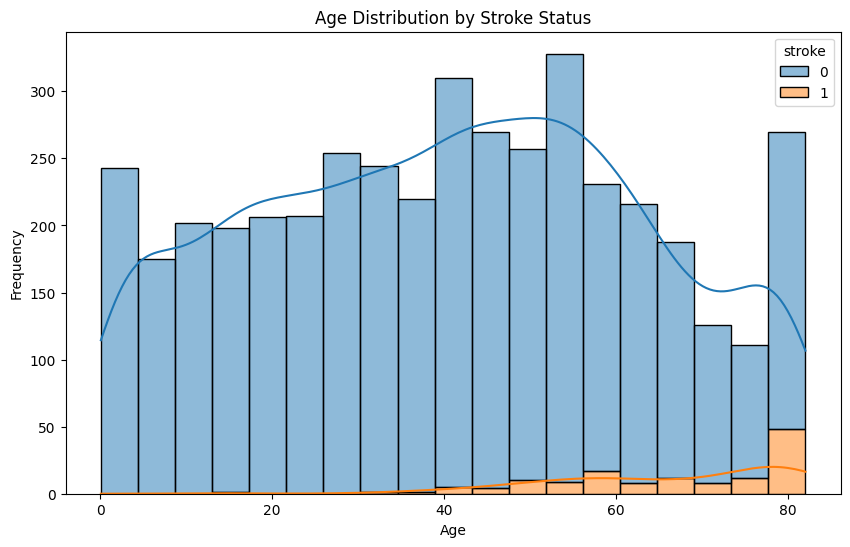

In [19]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='stroke', multiple='stack', kde=True)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

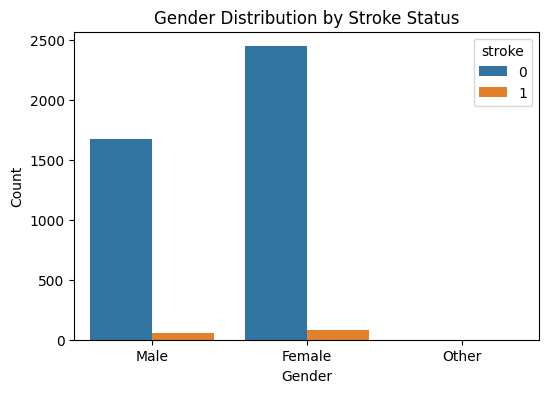

In [20]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Gender Distribution by Stroke Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

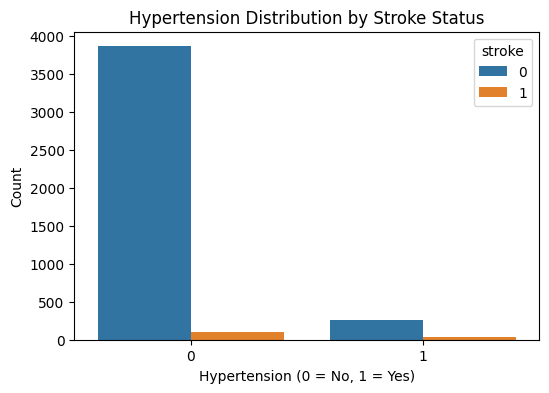

In [21]:
# Hypertension Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Hypertension Distribution by Stroke Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

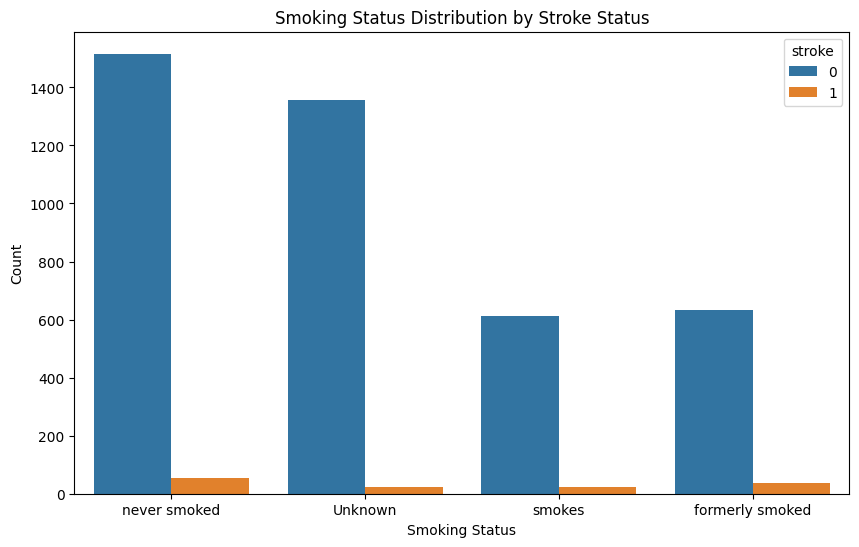

In [22]:
# Smoking Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title('Smoking Status Distribution by Stroke Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# Encoding Categorical Variables :

In [23]:
# Convert categorical columns to numeric (using LabelEncoder)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

# Correlation Analysis :

In [24]:
# Calculate the correlation matrix
corr = data.corr()

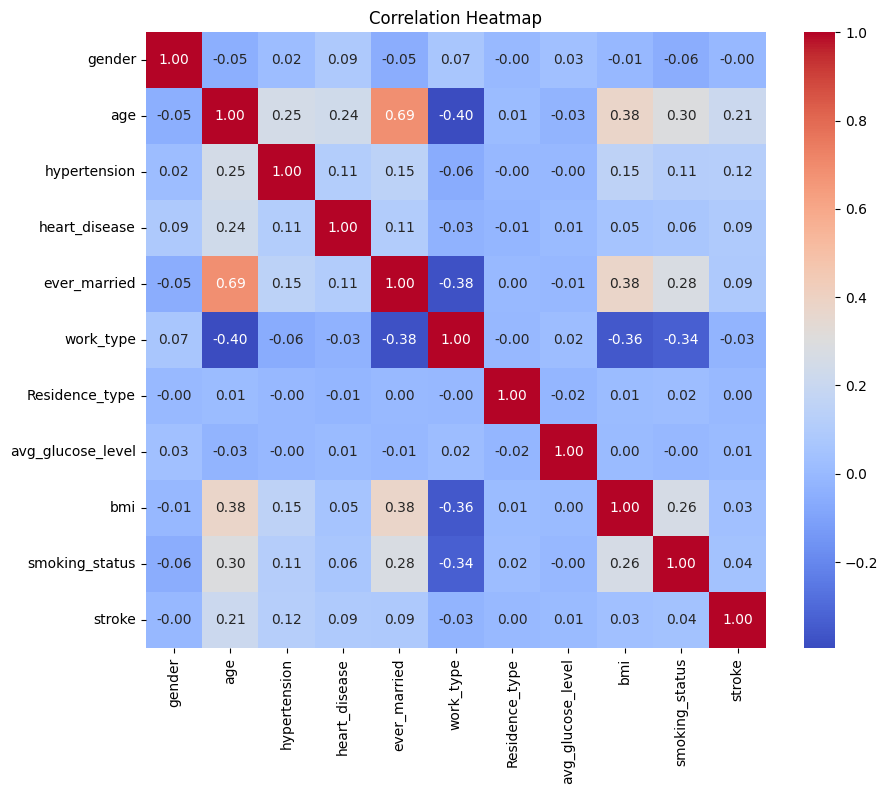

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [26]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'BMI')

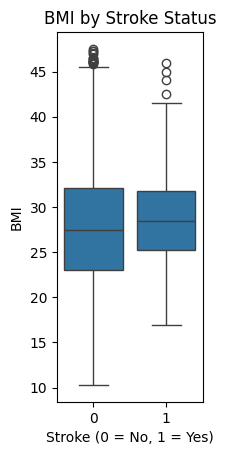

In [27]:
# Boxplot for BMI
plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title('BMI by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')

Text(0, 0.5, 'Avg Glucose Level')

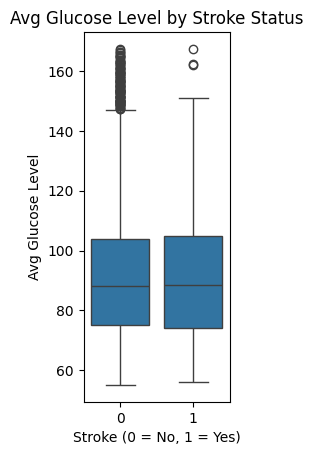

In [28]:
# Boxplot for Average Glucose Level
plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title('Avg Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Avg Glucose Level')

Text(0, 0.5, 'Age')

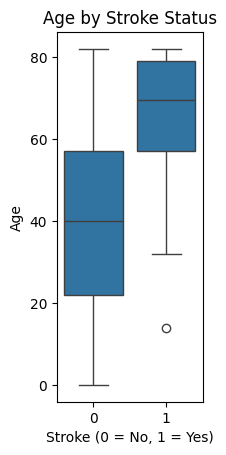

In [29]:
# Boxplot for Age
plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')

In [30]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Feature Preparation for Model :

In [31]:
# Splitting data into features (X) and target (y)
X = data.drop('stroke', axis=1)
y = data['stroke']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Performance Evaluation for Stroke Prediction :

In [32]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Means': KMeans(n_clusters=2, random_state=42)  # Adjust for binary classification if needed
}

# Train each model and evaluate performance
trained_models = {}
performance_metrics = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[model_name] = model

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# Create a DataFrame from the performance metrics list
performance_df = pd.DataFrame(performance_metrics)

Model: Logistic Regression
Confusion Matrix:
[[1233    0]
 [  44    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1233
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1277
   macro avg       0.48      0.50      0.49      1277
weighted avg       0.93      0.97      0.95      1277


--------------------------------------------------

Model: Naive Bayes
Confusion Matrix:
[[1144   89]
 [  28   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1233
           1       0.15      0.36      0.21        44

    accuracy                           0.91      1277
   macro avg       0.56      0.65      0.58      1277
weighted avg       0.95      0.91      0.93      1277


--------------------------------------------------

Model: K-Nearest Neighbors
Confusion Matrix:
[[1230    3]


# Evaluation Results of Classification Algorithms for Stroke Prediction :

In [33]:
# Print the summary of performance metrics in tabular format
print("Performance Metrics Summary:")
print(performance_df)

Performance Metrics Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.965544   0.932276  0.965544  0.948618
1          Naive Bayes  0.908379   0.947727  0.908379  0.925972
2  K-Nearest Neighbors  0.964761   0.947445  0.964761  0.951012
3        Decision Tree  0.919342   0.938033  0.919342  0.928364
4        Random Forest  0.966327   0.967462  0.966327  0.950528
5              K-Means  0.079092   0.823423  0.079092  0.103183


# Stroke Prediction Function : User Input and Model Prediction

In [35]:
# Function to predict stroke
def predict_stroke(model, scaler):
    # Collect input data from user in the specified order
    gender = int(input("Enter gender (1 = Male, 0 = Female): "))
    age = float(input("Enter age (e.g., 25 to 90): "))
    hypertension = int(input("Enter hypertension (1 = Yes, 0 = No): "))
    heart_disease = int(input("Enter heart disease (1 = Yes, 0 = No): "))
    ever_married = int(input("Enter Ever Married (1 = Yes, 0 = No): "))  # Moved to match order
    work_type = int(input("Enter work type (1 = Private, 2 = Self-employed, 3 = Government, 4 = Child, 5 = Never Worked): "))
    residence_type = int(input("Enter Residence Type (1 = Urban, 0 = Rural): "))
    avg_glucose_level = float(input("Enter average glucose level (mg/dL) (e.g., 80 to 300): "))
    bmi = float(input("Enter body mass index (BMI) (e.g., 18.5 to 40): "))
    smoking_status = int(input("Enter smoking status (1 = Formerly smoked, 2 = Smokes, 3 = Never smoked): "))

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'Residence_type': [residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    prediction_proba = model.predict_proba(input_data_scaled)

    # Output the prediction result
    if prediction[0] == 1:
        print("Predicted : Stroke")
    else:
        print("Predicted : No Stroke")

    # Optionally display the probability of the prediction
    print(f"Prediction Probability: {prediction_proba[0]}")

# Call the function with the fitted scaler and the desired model
decision_tree_model = trained_models['Decision Tree']  # Choose the desired model
predict_stroke(decision_tree_model, scaler)

Enter gender (1 = Male, 0 = Female): 1
Enter age (e.g., 25 to 90): 50
Enter hypertension (1 = Yes, 0 = No): 1
Enter heart disease (1 = Yes, 0 = No): 0
Enter Ever Married (1 = Yes, 0 = No): 1
Enter work type (1 = Private, 2 = Self-employed, 3 = Government, 4 = Child, 5 = Never Worked): 3
Enter Residence Type (1 = Urban, 0 = Rural): 1
Enter average glucose level (mg/dL) (e.g., 80 to 300): 250
Enter body mass index (BMI) (e.g., 18.5 to 40): 25
Enter smoking status (1 = Formerly smoked, 2 = Smokes, 3 = Never smoked): 1
Predicted : No Stroke
Prediction Probability: [1. 0.]


In [36]:
import joblib

# Save the Decision Tree model and scaler
joblib.dump(trained_models['Decision Tree'], 'decision_tree_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

# Conclusion : In this project, we analyzed the Stroke Prediction Dataset to explore patterns and factors contributing to stroke occurrence. Through detailed EDA and visualizations, we identified key distributions and relationships within the data, and after preprocessing, we applied various classification models—Logistic Regression, Naive Bayes, KNN, Decision Tree, Random Forest, and K-Means. We evaluated each model using accuracy, precision, recall, and F1-score, which revealed that [Decision Trees Model] was the most effective in predicting stroke cases accurately. This analysis demonstrates the value of machine learning in medical prediction tasks, with a well-processed dataset contributing to model success.